In [1]:
%matplotlib inline

# scikit-image 

## 0) Referências
- http://scikit-image.org/docs/stable/user_guide.html
- http://scikit-image.org/docs/stable/api/api.html
- https://en.wikipedia.org/wiki/Canny_edge_detector



## 1) Introdução

<p> O **<code>scikit-image</code>** é um pacote do Python para processamento de imagens que funciona com arrays do numpy, importado como skimage. 


In [ ]:
import skimage

<p>A maioria de suas funções são encontradas em submódulos. A lista contendo os submódulos e funções  do skimage é encontrada [aqui](http://scikit-image.org/docs/stable/api/api.html). Dentro do scikit-image, imagens são representadas como Numpy arrays, por exemplo arrays 2-D para imagens em escala de cinza 2-D.</p>
<p>O submódulo **<code>skimage.data</code>** fornece um grupo de funções retornando exemplos de imagens que podem ser usados para se acostumar rapidamente com o uso das funções do **skimage**.

In [ ]:
from skimage import data

Uma das imagens que estão neste submódulo é  <code>camera</code>. A partir dela, podemos extrair informações como:

In [ ]:
camera = data.camera()

In [ ]:
type(camera)

Como dito acima, as imagens são transformadas em arrays do Numpy. Como todo array, pode-se extrair seu <code>.shape</code> da seguinte forma.

In [ ]:
camera.shape

Ou seja, um array com 512 linhas e 512 colunas.

É possível carregar inclusive sua própria imagem como arrays do Numpy usando o módulo <code>io.imread()</code> da seguinte forma:


In [ ]:
import os
from skimage import io

In [ ]:
filename = os.path.join(skimage.data_dir, 'moon.png')

In [ ]:
moon = io.imread(filename)

## 2) Informações rápidas sobre o Numpy

Imagens manipuladas pelo <code>scikit-image</code> são simplesmente arrays do Numpy. Por este motivo, uma grande fração das operações nas imagens irá consistir em usar o Numpy.

In [ ]:
from skimage import data


In [ ]:
camera = data.camera()
type(camera)

Podemos obter informações como a geometria da imagem (<code>shape</code>) e o número de pixels (<code>size</code>), respectivamente, da seguinte forma:

In [ ]:
camera.shape 

In [ ]:
camera.size

Além disso, é possível obter informções estatísticas sobre os valores cinza. (preto = 0, branco = 255, cinza = escala dentro desses limites).
 

In [ ]:
camera.min(), camera.max(), camera.mean()

### Indexação do Numpy
A indexação pode ser usada para descobrir valores dos pixels, e para modificá-los. Para acessar valores do array na 10ª linha e 20ª coluna usa-se:

In [ ]:
camera[10,20]

Para alterar o valor acima, ou torná-lo preto (0) usa o seguinte comando:

In [ ]:
camera[10,20] = 0

In [ ]:
camera[10,20]

Mas tome cuidado na Indexação do Numpy, a primeira dimensão (**<code>camera.shape[0]</code>**) corresponde a linhas, enquanto a segunda (**<code>camera.shape[1]</code>**) corresponde a colunas, com origem em (**<code>camera.shape[0,0]</code>**) no canto superior esquerdo. Isto ocorre de forma similar as notações de matrizes/algebra linear, mas entra contraste com coordenadas cartesianas (x,y). Mais adiante abordaremos o assunto com mais detalhes.

Indo um pouco mais adiante, além de pixels individuais, é possível acessar/modificar valores de um grupo de pixels usando as diferentes possibilidades de indexação do Numpy.

- Slicing:
<p>Na célula abaixo, transformamos todas as 10 primeiras linhas de camera em preto.</p>

In [ ]:
camera[:10] = 0

plt.figure(figsize=(4, 4))
plt.imshow(camera, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.show()

- Mascarando - Masking (indexando com mascaras de booleanas - True ou False):
<p>Antes vamos definir a máscara para valores menores que 87, depois aplicamos a máscara em câmera e modificamos os valores da máscara em branco (255).</p>

In [ ]:
mask = camera < 87
camera[mask] = 255

plt.figure(figsize=(4, 4))
plt.imshow(camera, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.show()

- Indexando com grupos de indices

In [ ]:
import numpy as np

In [ ]:
import numpy as np
inds_r = np.arange(len(camera))
inds_c = 4 * inds_r %len(camera)

**_ Obs: Em python, % retorna o resto de uma divisão x%y, na qual x é o numerador e y o denominador._**
<code>
\>>> 6%2
\>>> 0 
\>>> 6%5
\>>> 1
</code>
 **_em casos onde o numerador é menor que o denominador, o resultado da divisão é sempre zero e o resto será o próprio numerador pois trata-se de uma divisão por intergers_**.
 <code>
\>>> int(2/6)
\>>> 0 
\>>> 2%6
\>>> 2
</code>
 

In [ ]:
camera[inds_r, inds_c] = 0

plt.figure(figsize=(4, 4))
plt.imshow(camera, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt

camera = data.camera()
camera[:10] = 0
mask = camera < 87
camera[mask] = 255
inds_x = np.arange(len(camera))
inds_y = (4 * inds_x) % len(camera)
camera[inds_x, inds_y] = 0

l_x, l_y = camera.shape[0], camera.shape[1]
X, Y = np.ogrid[:l_x, :l_y]
outer_disk_mask = (X - l_x / 2)**2 + (Y - l_y / 2)**2 > (l_x / 2)**2
camera[outer_disk_mask] = 0

plt.figure(figsize=(4, 4))
plt.imshow(camera, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.show()

### Imagens Coloridas
 
Tudo dito acima é válido para imagens coloridas. Elas também são array do Numpy, mas com uma dimensão a mais para os canais de cor ( vermelho, verde , azul). 

In [ ]:
cat = data.chelsea()
plt.imshow(cat)

In [ ]:
type(cat)

In [ ]:
cat.shape

**<code>cat</code>** é uma imagem de 300x451 pixels com três canais (red, green, blue). Como as imagens acima, podemos obter e definir valores aos pixels.

In [ ]:
cat[10,20]

In [ ]:
cat[50,60] = 0

Para tornar verde o pixel:

In [ ]:
cat[50,61] = [0,255,0] #[red,green,blue]

Para usar uma mask numa imagem colorida:

In [ ]:
cat = data.chelsea()
reddish = cat[:,:,0] > 160
cat[reddish] = [255, 0, 0]
plt.imshow(cat)

### Convenções de Coordenadas
<p>Como representamos imagens como arrays do Numpy, nossas coordenadas devem estar de acordo. Imagens em escala de cinza bidimensionais (2D) como a câmera acima são indexadas por linha (row) e coluna (columns) (abreviados para ou ** <code>row, col</code>** quanto para **<code>r, c</code>**), com o menor elemento (0,0) no topo do canto esquerdo. Em várias partes da biblioteca, você também verá **<code>rr, cc</code>** se referindo a listas com coordenadas de linhas e colunas.Isto é uma distinção do par ordenado (x,y), comumente denotando coordenadas cartesianas, onde x é a coordenada horizontal, y a vertical e a origem no canto inferior esquerdo. O pacote matblotlib, por exemplo, usa essa conveção.<p>
<p> No caso de imagens coloridas (ou de multicanal), a última dimensão contém a informação das cores e é denotada por **<code>channel</code>** ou **<code>ch</code>**.

Finalmente, em imagens 3D, como vídeos, Imagens de Ressonância Magnética (IRM), a dimensão que lidera é **<code>plane</code>**, abreviada como  **<code>pln</code>** ou **<code>pl</code>**.

Essas dimensões são resumidas na tabela abaixo:

| **Tipo de Imagem** | **Coordenadas**     |
|:------------------:|---------------------|
| 2D Escala de Cinza | (row, col)          |
|    2D multicanal   | (row, col, ch)      |
| 3D Escala de Cinza | (pln, row, col)     |
| 3D multicanal      | (pln, row, col, ch) |

Muitas funções in scikit-image operam diretamente em imagens 3D:

In [ ]:
import numpy as np
im3d = np.random.rand(100, 1000, 1000)

In [ ]:
print('im3d: ', im3d)

In [ ]:
import numpy
from skimage import morphology
from scipy import ndimage as ndi
seeds = ndi.label( im3d < 0.1)[0]
ws = morphology.watershed(im3d, seeds)

<p> Em muitos casos, a terceira dimensão da imagem tem uma resolução menor do que as outras duas. Algumas funções do scikit-image fornecem o argumento <code>spacing</code> para processar essas imagens:</p>


In [ ]:
from skimage import segmentation
slics = segmentation.slic(im3d, spacing=[5, 1, 1], multichannel = False)

<p>Já em outros, o processamento deve ser feito em planos.  Quando os planos forem a dimensão que lidera, podemos usar a seguinte sintaxe:</p>
<p>**<code>
from skimage import filters
edges = np.zeros_like(im3d)
for pln, image in enumerate(im3d):
    #faça iterações ao longo da dimensão governante (planos)
    edges[pln] = filters.sobel(image)
</code>**</p>    

### Notas na ordem de um array
<p>Embora o rótulo dos eixos pareça arbitrário, ele pode ter um efeito significante na velocidade das operações. Isto acontece porque os processadores modernos nunca fornecem apenas um item da memória, mas um grupo de itens adjacentes. Isto é chamado de **_prefetching_**. Logo, processar elementos que estão próximos uns aos outros na memória é mais rápido do que processá-los em uma ordem diferente, mesmo que o número de operações seja o mesmo. </p>

In [ ]:
def in_order_multiply(arr, scalar):
    for plane in list (range(arr.shape[0])):
        arr[plane, :, :] *= scalar       

In [ ]:
def out_of_order_multiply(arr,scalar):
    for plane in list(range(arr.shape[2])):
        arr[:,:,plane] *= scalar

In [ ]:
import time
im3d = np.random.rand(100, 1024, 1024)                     

In [ ]:
t0 = time.time()
x = in_order_multiply(im3d, 5)
t1 = time.time()
print("%.2f seconds" % (t1 - t0)) 

In [ ]:
im3d_t = np.transpose(im3d).copy()
im3d_t.shape

In [ ]:
s0 = time.time()
x = out_of_order_multiply(im3d, 5)
s1 = time.time()
print("%.2f seconds" % (s1 - s0))

In [ ]:
print("Speedup: %.1fx" % ((s1 - s0) / (t1 - t0)))

Quando a dimensão que você está iterando é ainda maior, a velocidade é ainda mais dramática. Vale a pena pensar sobre esta localização do dado quando for escrever algoritmos. 

### Notas sobre tempo
<p> Embora scikit-image (0.11) não suporte atualmente funções para trabalhar especificamente com dados 3D variando no tempo, nossa compatibilidade com arrays numpy permitem que trabalhemos naturalmente com um array 5D de shape (t,pln,row,col,ch):</p>
<p>**<code>
for timepoint in image5d:
    #cada timepoint é uma imagem 3D multicanal
    faça_algo_com(timepoint)
</code>
**</p>
Podemos complementar a tabela acima com: 

|  **Tipo de Imagem**   |   **Coordenadas**     |
|:---------------------:|-----------------------|
|   2D Escala de Cinza  |      (row, col)       |
|      2D multicanal    |     (row, col, ch)    |
|   3D Escala de Cinza  |    (pln, row, col)    |
|   3D multicanal       |  (pln, row, col, ch)  |
| **2D video colorido** | **(t, row, col, ch)** |
|**3D video multicanal**|**(t,pln,row,col,ch)** | 

## 3) Data types (dtypes) das Imagens, o que significam e como o scikit-image as trata. 

Os arrays do Numpy podem ser de diferentes tipos de interger ou float. Para evitar distorções nas imagens, assumimos que imagens usam os seguintes dtypes ranges:

|  dtype | Range           |
|:------:|-----------------|
| uint8  | 0 a 255         | 
| uint16 | 0 a 65535       |
| uint32 | 0 a 2³²         |
| float  | -1 a 1 ou 0 a 1 |
| int8   | -128 a 127      |
| int16  | -32768 a 32767  |
| int32  | -2³¹ a (2³¹ -1) |

Note que as imagens float devem ser restritas à range -1 a 1 mesmo sabendo que o data type por si só possa execeder este intervalo; Todos os interger dtypes, por outro lado, possuem intensidades de pixel que podem ocupar toda a range do data type.
O **u** em uint8, por exemplo, vem de _unsigned_ e faz com que os pixels só assumam valores positivos.
Para cada intx dtype, temos  que 2^x é o range daquele datatype. 

In [ ]:
print(2**8)

Logo, temos de 0 a 255 (256 possibilidades) para possíveis valores em um dtype uint8.
<p> As funções no skimage são criadas para aceitar todos esses dtypes, mas, para eficiência, pode retornar uma imagem de um dtype diferente. Se você precisar de um dtype específico, o skimage fornece funções que convertem dtypes e reorganizam a intensidade das imagens. Não se deve usar **<code>astype</code>** em uma imagem, pois ela viola essas regras sobre o range de cada dtype.,</p>

### Tipos de Entrada (Input)
<p> Embora tentemos preservar o range dos dados e o tipo das imagens de entrada, as funções podem suportar apenas um subset destes dtypes. Neste caso, o input será convertido para o tipo requerido (se possível) e uma mensagem de aviso será impressa ao log se uma cópia for necessária. Os tipos requeridos devem notados com bastante atenção nos docstrings.</p>

|    Função    |          Descrição         |
|:------------:|:--------------------------:|
| img_as_float |    Converte para 64-bit.   |
| img_as_ubyte |  Converte para 8-bit uint. |
|  img_as_uint | Converte para 16-bit uint. |
|  img_as_int  |  Converte para 16-bit int. |

<p> Estas funções convertem imagens para os dtypes desejados e redistribui os seus valores. Se a conversão reduzir a precisão da imagem, um aviso é mostrado: 

In [ ]:
from skimage import img_as_ubyte
import numpy as np
image = np.array([0, 0.5, 1], dtype=float)
img_as_ubyte(image)

<p>Além disso, algumas funções recebem um argumento <code>preserve_range</code> 
nas quais aconversão da range é conveniente, mas não necessária. Por exemplo, a interpolação em <code>transform.warp</code> requer uma imagem do tipo float que deve ter uma _range_ de [0, 1]. Logo, por padrão, a escala das imagens de entrada será reajustada para essa _range_. Entretanto, em alguns casos, os valores da imagem representam medidas físicas, como temperatura ou valores de probabilidade de chover, que os úsuários não querem que sejam "reescalados". Com <code>preserve_range=True</code>, a range original do dado será preservada, mesmo que o output seja uma imagem float. Os usuários devem se assegurar que essa imagem fora do padrão seja processada adequadamente por funções downstream(?*?), que devem esperar uma imagem em [0, 1].</p>


In [ ]:
from skimage import data
from skimage.transform import rescale

In [ ]:
image = data.coins()
image.dtype, image.min(), image.max(), image.shape

In [ ]:
rescaled = rescale(image, 0.5)

In [ ]:
(rescaled.dtype, np.round(rescaled.min(),4), np.round(rescaled.max(),4), rescaled.shape)

In [ ]:
rescaled = rescale(image, 0.5, preserve_range=True)

In [ ]:
(rescaled.dtype, np.round(rescaled.min()), np.round(rescaled.max()), rescaled.shape)

### Tipos de Saída (output)
<p>O tipo de output de uma função é determinado pelo autor da função e é documentado para benefício do usuário. Enquanto isso requer que o usuário converta explicitamente para o formato do output desejado, isso também garante que nenhuma copia desnecessária ocupe espaço. </p>
<p>O usuário que requer um tipo específico de output (para propósitos de exibição), pode escrever:</p> 
<code>
\>>>from skimage import img_as_uint
\>>>out = img_as_uint(sobel(image))
\>>>plt.imshow(out)
</code>

### Processamento de Imagem Pipeline
<p> Este comportamento do dtype permite que usemos juntas qualquer função do skimage sem se preocupar com o dtype da imagem. Por outro lado, se você quiser usar uma função customizada que requer um dtype específico, você deve usar uma das funções de conversão de dtype (aqui, <code>func1</code> e <code>func2</code> são funções skimage):</p>
<code>
\>>> from skimage import img_as_float
\>>> image = img_as_float(func1(func2(image)))
\>>> processed_image = custom_func(image)
</code>

<p>Melhor ainda, você pode converter a imagem internamente e usar um processamento pipeline simplificado:</p>
<code>
\>>> def custom_func(image):
\...     image = img_as_float(image)
\...     # do something
\...
\>>> processed_image = custom_func(func1(func2(image)))
</code>

### Reajustando valores de intensidade
<p>Sempre que possível, funções devem evitar distorcer as intensidades de imagens (por exemplo, reajustando o dtype para float para que os valores min e max da intensidade sejam 0 e 1), já que isso pode distorcer drasticamente a imagem. Por exemplo, se você estiver procurando por marcadores claros em imagens escuras, pode haver imagens nas quais nenhum esteja presente; ao distorcer a intensidade do input para agrupar toda a range faria com que o ruido de fundo pareça com marcadores.</p>
<p>Algumas vezes, entretanto, você tem imagens que deveriam agrupar toda a _range_ mas não o faz. Por exemplo, algumas câmeras armazenam imagens com 10-, 12-, ou 14-bit de profundidade por pixel. Se estas imagens são armazenadas com um array com o dtype uint16, então a imagem não extenderia por toda a série, e logo, apareceria mais brilhante do que deveria. Para corrigir isto, você pode usar a função <code>rescale_intensity</code> para reajustar o tamanho para que ela use a série inteira no intervalo.</p>
**<code>
\>>> from skimage import exposure
\>>> image = exposure.rescale_intensity(img10bit, in_range=(0, 2**10 - 1))
</code>**
<p>Aqui, o argumento <code>in_range</code> é ajustado para o intervalo máximo de imagem de 10-bit. Por padrão, <code>rescale_intensity</code> estica os valores de <code>in_range</code> para corresponder o intervalo do dtype. <code>rescale_intensity</code> também aceita strings como input no <code>in_range</code> e <code>out_range</code>, então o exemplo acima poderia ser escrito como:</p>
**<code>
\>>> image = exposure.rescale_intensity(img10bit, in_range='uint10')
</code>**

### Notas sobre valores negativos
<p>As pessoas frequentemente representam imagens em signed dtypes, mesmo só manipulando os valores positivos da imagem (por exemplo, usando só de 0-127 em uma imagem int8). Por este motivo, funções de conversão só espalham os valores positivos de um signed dtype ao longo de toda a série de um unsigned dtype. Em outras palavras, os valores negativos são indexados a 0 quando converte-se de signed para unsigned dtypes. Os valores negativos só são preservados quando se converte entre signed dtypes. Para prevenir este comportamento, você deve ajustar o tamanho da sua imagem de antemão:</p>
<code>
\>>> image = exposure.rescale_intensity(img_int32, out_range=(0, 2**31 - 1))
\>>> img_uint8 = img_as_ubyte(image)
</code>
<p>Este comportamento é simétrico: Os valores em um dtype unsigned são espalhados somente na série positiva de um dtype signed.</p>

In [ ]:
import skimage
import numpy as np
import skimage.color as color

## 4) Ajustes de Imagem: transformando conteúdo da imagem
### 4.1) Manipulação de cor:
A maioria das funções para manipular canais de cores é encontrada no submodulo <code>skimage.color</code>.
#### 4.1.1) Conversão entre modelos de cor
<p>Imagens coloridas podem ser representadas usando diferentes [color spaces](https://en.wikipedia.org/wiki/Color_space). Um dos color spaces mais comuns é o [RGB](https://en.wikipedia.org/wiki/RGB_color_model), onde uma imagem tem canais nas cores vermelho, verde e azul. Entretanto, outros modelos de cor são amplamente usados, como o [HSV](https://en.wikipedia.org/wiki/HSL_and_HSV) onde os canais de hue, saturação e valor são canais indepentes, ou o modelo [CMYK](https://en.wikipedia.org/wiki/CMYK_color_model) (cyan, magenta, yellow, and key (black)) usado para impressão.</p>
<p><code>skimage.color</code> fornece funções úteis para converter imagens para e de diferentes color spaces. Interger-type arrays podem ser transformados para floating-point type pela operação:</p>
- vermelho brilhante saturado:

In [ ]:
red_pixel_rgb = np.array([[[255, 0, 0]]], dtype=np.uint8)
color.rgb2hsv(red_pixel_rgb)

- azul escuro saturado

In [ ]:
dark_blue_pixel_rgb = np.array([[[0, 0, 100]]], dtype=np.uint8)
color.rgb2hsv(dark_blue_pixel_rgb)

- rosa menos saturado

In [ ]:
pink_pixel_rgb = np.array([[[255, 100, 255]]], dtype=np.uint8)
color.rgb2hsv(pink_pixel_rgb)

#### 4.1.2) Conversão entre RGB e escala de cinza
<p>Essa conversão é realizada usando a função<code>rgb2gray()</code>.</p>

In [ ]:
from skimage.color import rgb2gray
from skimage import data

In [ ]:
img = data.astronaut()
img_gray = rgb2gray(img)

<p><code>rgb2gray</code> usa um peso não uniforme de canais de cores, por causa da diferença de sensibilidade do olho humano às diferentes cores. Entretanto, este peso garante a preservação da luz do RGB para escala de cinza:</p>

In [ ]:
red_pixel = np.array([[[255, 0, 0]]], dtype=np.uint8)
color.rgb2gray(red_pixel)

In [ ]:
green_pixel = np.array([[[0, 255, 0]]], dtype=np.uint8)
color.rgb2gray(green_pixel)

<p> Convertendo imagem de escala de cinza para RGB com **<code>gray2rgb()</code>** simplismente duplica os valores de cinza, para cada um dos três canais.</p>

#### 4.1.3) Pintando imagens usando labels:
- 4.1.3.1) Tingindo imagens em escala de cinza [link](http://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_tinting_grayscale_images.html#example-color-exposure-plot-tinting-grayscale-images-py)
- 4.1.3.2) [link](http://scikit-image.org/docs/stable/auto_examples/segmentation/plot_join_segmentations.html#example-segmentation-plot-join-segmentations-py)
- 4.1.3.3) [link](http://scikit-image.org/docs/stable/auto_examples/segmentation/plot_rag_mean_color.html#example-segmentation-plot-rag-mean-color-py)

~ fazer depois

### 4.2) Contraste e Exposição
<p> Os pixels da imagem podem assumir valores determinado pelo seu dtype, como por exemplo de 0 a 255 para imagens uint8 ou [0,1] para imagens floating-point. Entretanto, a maioria das imagens ou possuem uma variação muito curta (por causa do fraco contraste), ou possui a maioria dos valores de pixels concentrado em um subintervalo dos valores acessíveis. <code>skimage.exposure</code> fornece funções que espalham os valores de  intensidade ao longo de um intervalo maior.</p>
<p>Métodos de primeira classe computam função não linear de intensidade, que é independente dos valores do pixel de uma imagem específica. Tais métodos são frequentemente usados para corrigir uma não-linearidade conhecida de sensores, ou receptores como o olho humano. Um exemplo conhecido é a [Gamma Correction](https://en.wikipedia.org/wiki/Gamma_correction), implementada em <code>adjust_gamma()</code>.</p>
<p>Outros métodos redistribuem valores de pixel de acordo com o histograma da imagem. O histograma de valores de pixels é computado com <code>skimage.exposure.histogram()</code>.</p>

In [ ]:
image = np.array([[1, 3], [1, 1]])
skimage.exposure.histogram(image)

<p><code>histogram()</code> retorna os numeros de pixels para cada valor de intervalo de série, e os centros dos intervalos. O comportamento de <code>histogram()</code> é diferente do <code>numpy.histogram()</code>, que retorna os limites (inferior e superior) dos intervalos.</p>
<p> A melhoria mais simples de contraste, <code>rescale_intensity()</code>, consiste em esticar valores de pixel para toda a série permitida, usando transformação linear:

In [ ]:
from skimage import exposure
text = data.text()
text.min(), text.max()

In [ ]:
better_contrast = exposure.rescale_intensity(text)

In [ ]:
better_contrast.min(), better_contrast.max()

<p> Mesmo se a imagem usar toda a extensão da série, as vezes há pouco peso ao final dela. Neste caso, clippar valores de pixel usando percentis da imagem melhora o contraste (custando alguma perda de informação, porque alguns pixels são saturados por esta operação):</p>

In [ ]:
moon = data.moon()
v_min, v_max = np.percentile(moon, (0.2, 99.8))

In [ ]:
v_min, v_max

In [ ]:
better_contrast = exposure.rescale_intensity(moon, in_range=(v_min,v_max))

<p>A função <code>equalize_histogram()</code> mapeia a distribuição cumutaliva da função de valores dos pixels em uma função linear, garantindo que todas as partes da distribuição sejam igualmente representados na imagem. Como resultado, detalhes são enriquecidos em grandes regiões com pouco contraste. Com um refinamento adicional, a equalização do histograma pode ser realizada em subregiões da imagem com <code>equalize_adapthist()</code>, de modo a corrigir os gradientes de exposição ao longo da imagem. 
Veja o exemplo abaixo de equalização de um histograma:

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure


matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(img, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    img = img_as_float(img)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(img, cmap=plt.cm.gray)
    ax_img.set_axis_off()
    ax_img.set_adjustable('box-forced')

    # Display histogram
    ax_hist.hist(img.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(img, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = data.moon()

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2,4), dtype=np.object)
axes[0,0] = fig.add_subplot(2, 4, 1)
for i in range(1,4):
    axes[0,i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0,4):
    axes[1,i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

## 5) I/O Infraestrutura do Plugin

<p>O plugin consiste em dois arquivos,a origem e o descritor <code>.ini</code> . Vamos supor que gostaríamos de fornecer um plugin para imshow usando o matplotlib. Vamos chamar nosso plugin de mpl:</p>
<code>
skimage/plugins/io/_plugins/mpl.py
skimage/plugins/io/_plugins/mpl.ini
</code>
<p> O nome dos arquivos **.py** e **.ini** devem ser iguais. Dentro do arquivo .ini, nós damos o metadado do plugin:

<code>
[mpl] <-- name of the plugin, may be anything
description = Matplotlib image I/O plugin
provides = imshow <-- a comma-separated list, one or more of
                      imshow, imsave, imread, _app_show
</code>                      

<p> A linha "provides" lista todas as funções fornecidas pelo plugin. Já que nosso plugin fornece <code>imshow</code>, temos que definí-lo dentro de <code>mpl.py</code>:</p>

In [ ]:
# This is mpl.py

import matplotlib.pyplot as plt

def imshow(img):
    plt.imshow(img)

Note que, por padrão, <code>imshow</code> é uma função non-blocking\*, então a função especial <code>_app_show_</code> deve ser fornecida para bloquear o GUI. Nós podemos modificar nosso plugin, como a seguir.

\*: uma função **_blocking_** é basicamente uma que pode levar um longo tempo. Em particular, se você fez uma função que lê dados, e espera para os dados chegarem antes de os retornarem.
Já uma **_non-blocking_**, por outro lado, seria uma criada para retornar imediatamente, com algum valor indicando que ela não tem dado desta vez.

<code>
[mpl]
provides = imshow, _app_show
</code>  

In [3]:
# This is mpl.py

import matplotlib.pyplot as plt

def imshow(img):
    plt.imshow(img)

def _app_show():
    plt.show()

<p>Qualquer plugin no diretório <code>_plugins</code> é automaticamente examinado por <code>skimage.io</code> até ser importada. Eles podem ser listadas, da seguinte forma:</p>

In [4]:
import skimage.io as io
io.find_available_plugins()

{'fits': ['imread', 'imread_collection'],
 'freeimage': ['imread', 'imsave', 'imread_collection'],
 'gdal': ['imread', 'imread_collection'],
 'gtk': ['imshow'],
 'imageio': ['imread', 'imsave', 'imread_collection'],
 'imread': ['imread', 'imsave', 'imread_collection'],
 'matplotlib': ['imshow', 'imread', 'imshow_collection', 'imread_collection'],
 'pil': ['imread', 'imsave', 'imread_collection'],
 'qt': ['imshow', 'imsave', 'imread', 'imread_collection'],
 'simpleitk': ['imread', 'imsave', 'imread_collection'],
 'test': ['imsave',
  'imshow',
  'imread',
  'imread_collection',
  'imshow_collection'],
 'tifffile': ['imread', 'imsave', 'imread_collection']}

Ou apenas os que foram carregados:

In [5]:
io.find_available_plugins(loaded=True)

{'matplotlib': ['imshow', 'imread', 'imshow_collection', 'imread_collection'],
 'pil': ['imread', 'imsave', 'imread_collection']}

<p> Um plugin é carregado usando o comando <code>use_plugin</code>: </p>

In [7]:
import skimage.io as io
io.use_plugin('pil')

Usa-se o método acima, para carregar todas as capacidades do plugin, ou o método abaixo caso queira carregar uma capacidade específica.

In [8]:
io.use_plugin('pil','imread')

Caso mais de um plugin seja carregado contendo a mesma capacidade, o último que for carregado será o usado. 
Para investigar as capacidades de um determinado plugin, use <code>plugin_info</code>:

In [9]:
io.plugin_info('pil')

{'description': 'Image reading via the Python Imaging Library',
 'provides': 'imread, imsave'}

## 5) Segmentação de Imagem

<p> Segmentação de Imagem é a tarefa de rotular os pixels de interesse de uma determinada imagem. 
Neste tutorial, vamos ver como segmentar objetos em um fundo. Vamos usar a imagem coins, do <code>skimage.data</code> . Essa imagem mostra várias moedas descatadas contra um fundo escuro.</p>

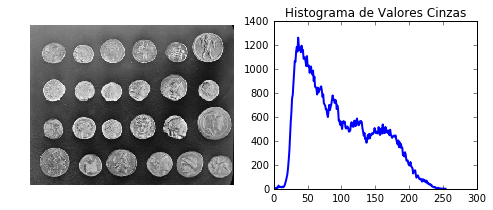

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data

coins = data.coins()
hist = np.histogram(coins, bins=np.arange(0, 256))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
ax1.imshow(coins, cmap=plt.cm.gray, interpolation='nearest')
ax1.axis('off')
ax2.plot(hist[1][:-1], hist[0], lw=2)
ax2.set_title('Histograma de Valores Cinzas')

<p> Uma maneira simples de segmentar as moedas é ao escolher um limiar baseado no histograma de valores cinzas. Infelizmente, ao aplicar limiares a esta imagem nos retornará uma imagem binária que ou perde partes significantes das moedas ou funde partes do fundo às moedas. </p> 

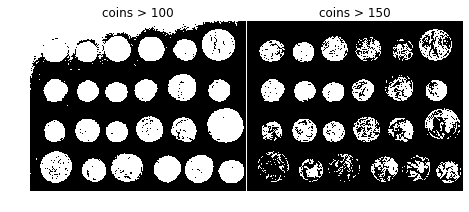

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3), sharex=True, sharey=True)
ax1.imshow(coins > 100, cmap=plt.cm.gray, interpolation='nearest')
ax1.set_title('coins > 100')
ax1.axis('off')
ax1.set_adjustable('box-forced')
ax2.imshow(coins > 150, cmap=plt.cm.gray, interpolation='nearest')
ax2.set_title('coins > 150')
ax2.axis('off')
ax2.set_adjustable('box-forced')
margins = dict(hspace=0.01, wspace=0.01, top=1, bottom=0, left=0, right=1)
fig.subplots_adjust(**margins)

### Segmentação baseada nas margens
<p>Em seguida, tentamos delinear os contornos das moedas usando segmentação das margens. Para isto usaremos o Canny edge-detector , uma espécie de detector de gradientes da imagem. 
Por curiosidade, o processo do Canny se resume em 5 passos:
</p>

 - Aplicar um filtro Gaussiano para retirar ruído da imagem
 - Achar os gradientes
 - Aplicar supressão não máxima para se livrar de detecções incorretas
 - Rastrear frentes por hysteresis: suprime as frentes mais fracas que não estão ligadas a uma forte.


In [10]:
help(canny)

Help on function canny in module skimage.feature._canny:

canny(image, sigma=1.0, low_threshold=None, high_threshold=None, mask=None, use_quantiles=False)
    Edge filter an image using the Canny algorithm.
    
    Parameters
    -----------
    image : 2D array
        Greyscale input image to detect edges on; can be of any dtype.
    sigma : float
        Standard deviation of the Gaussian filter.
    low_threshold : float
        Lower bound for hysteresis thresholding (linking edges).
        If None, low_threshold is set to 10% of dtype's max.
    high_threshold : float
        Upper bound for hysteresis thresholding (linking edges).
        If None, high_threshold is set to 20% of dtype's max.
    mask : array, dtype=bool, optional
        Mask to limit the application of Canny to a certain area.
    use_quantiles : bool, optional
        If True then treat low_threshold and high_threshold as quantiles of the
        edge magnitude image, rather than absolute edge magnitude valu

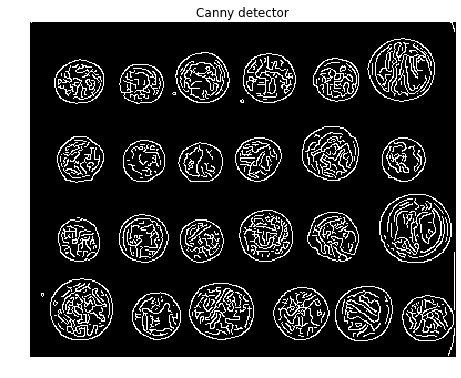

In [8]:
from skimage.feature import canny
edges = canny(coins/255.)

fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(edges, cmap=plt.cm.gray, interpolation='nearest')
ax.axis('off')
ax.set_title('Canny detector')